In [1]:
#%% ----------- Clustering: k-Means Clustering -------------------
# %reset

# Load data
import scipy.io as sio
import numpy.matlib as nm
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
t = sio.loadmat('bc_unsupervised.mat')
cmp = t['CMP']
tth = t['TTH']
xrd = t['XRD']
tth_ = nm.repmat(tth,xrd.shape[0],1)

xy = nm.zeros((cmp.shape[0],2))
xy[:,1] = nm.array(cmp[:,2]*0.8660,ndmin = 2).T
xy[:,0] = nm.add(cmp[:,1], xy[:,1].T*0.5774).T

<IPython.core.display.Javascript object>


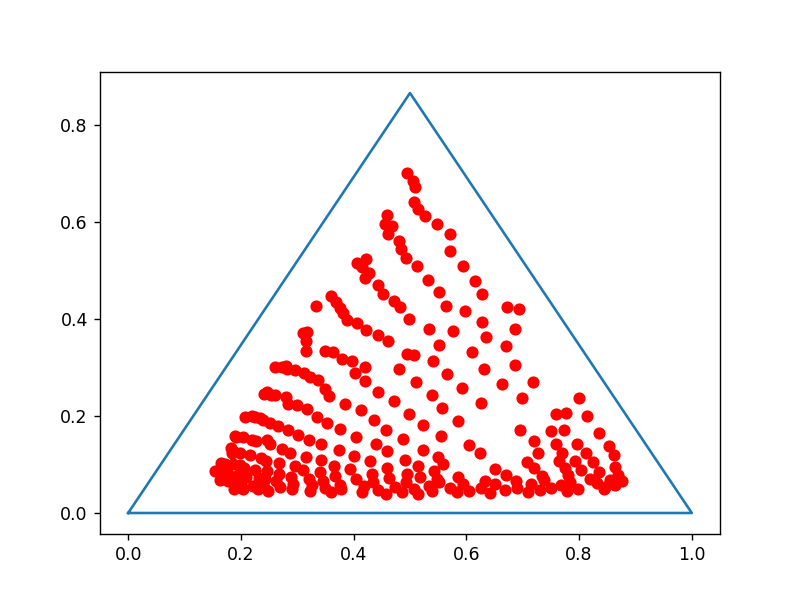

In [4]:
#%%
plt.figure(1)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.plot(xy[:,0],xy[:,1],'ro')

<IPython.core.display.Javascript object>


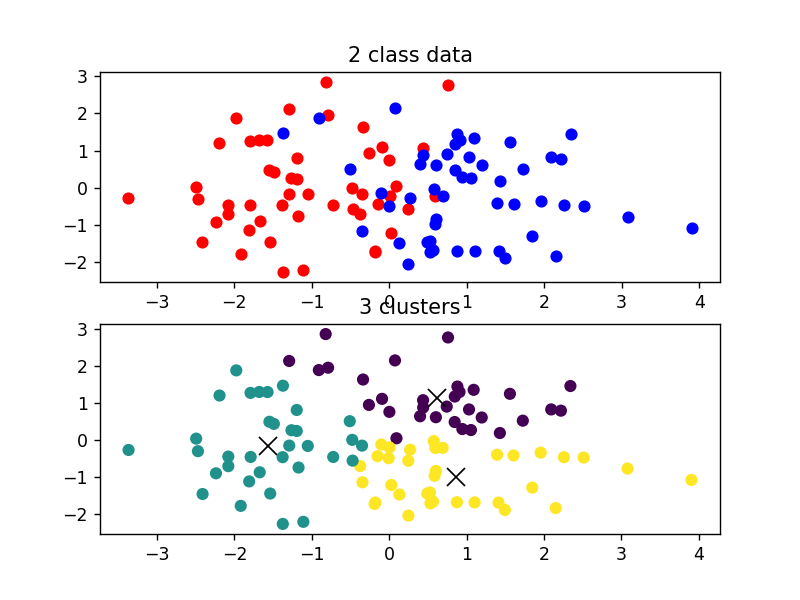

Text(0.5,1,'2 class data')

In [7]:
#%% Set up demo data set
# generate data set from 2 Gaussians.

distance_between_cluster_centers = 2

# generate data
x1 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x2 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x1[:,0] = x1[:,0] - distance_between_cluster_centers/2
x2[:,0] = x2[:,0] + distance_between_cluster_centers/2
x = nm.concatenate((x1, x2), axis=0)

plt.figure(2)
plt.clf()
plt.subplot(2,1,1)
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.title('2 class data')

In [9]:
#%% k-means clustering

from sklearn.cluster import KMeans
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, init = 'random', random_state = 0).fit(x)
L = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(2)
plt.subplot(2,1,2)
plt.cla()
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'kx',markersize = 10)
plt.title( str(k) + ' clusters')

# Try varying the number of of clusters
# & 
# Try varying the distance between the clusters
#
# Try running a few times to see different results

C:\Users\Boo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'3 clusters')

<IPython.core.display.Javascript object>


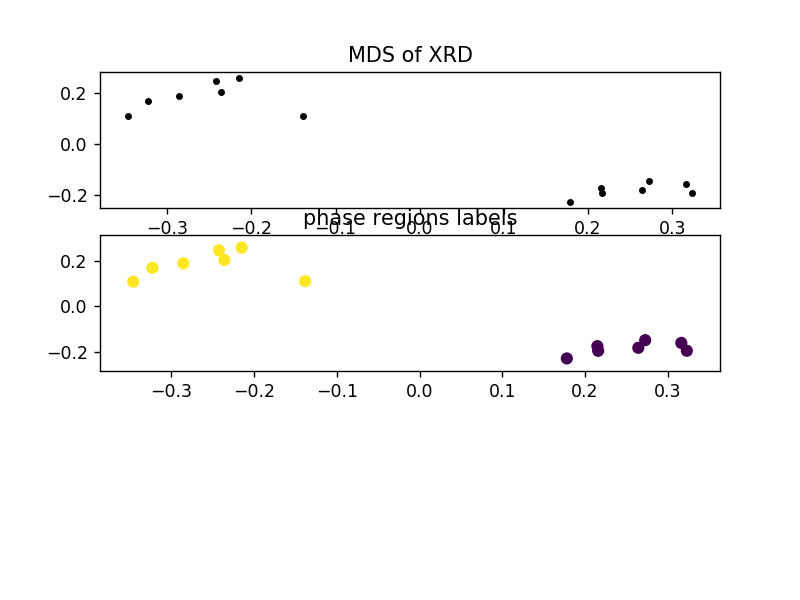

Text(0.5,1,'phase regions labels')

In [10]:
#%% Apply k-means to MDS results!

# compute MDS for XRD
xrd1 = xrd[0:7,:] # data set 1
xrd2 = xrd[189:196,:] # data set 2
s = nm.concatenate((xrd1, xrd2), axis=0) # Combine data into one matrix.

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import MDS

# get the MDS mapping for the XRD dataset
d = pairwise_distances(s, metric = 'cosine')
pos = MDS(n_components=2, dissimilarity="precomputed").fit(d).embedding_

# plot the MDS mapping
plt.figure(3)
plt.clf()
plt.subplot(3,1,1)
plt.plot(pos[:,0],pos[:,1],'k.')
plt.title('MDS of XRD')

# Plot the correct phase region labels
class_labels = nm.repeat(1,14)
class_labels[0:7] = 2
plt.subplot(3,1,2)
plt.scatter(pos[:,0],pos[:,1],c =class_labels)
plt.title('phase regions labels')

In [8]:
#%% run k-means on the MDS mapping
k = 2
kmeans = KMeans(n_clusters=k, random_state = 0).fit(pos)
L = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
plt.figure(3)
plt.subplot(3,1,3)
plt.cla()
plt.scatter(pos[:,0],pos[:,1],c = L)
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'kx', markersize=10)
plt.title('k-means results')
plt.tight_layout()

<IPython.core.display.Javascript object>


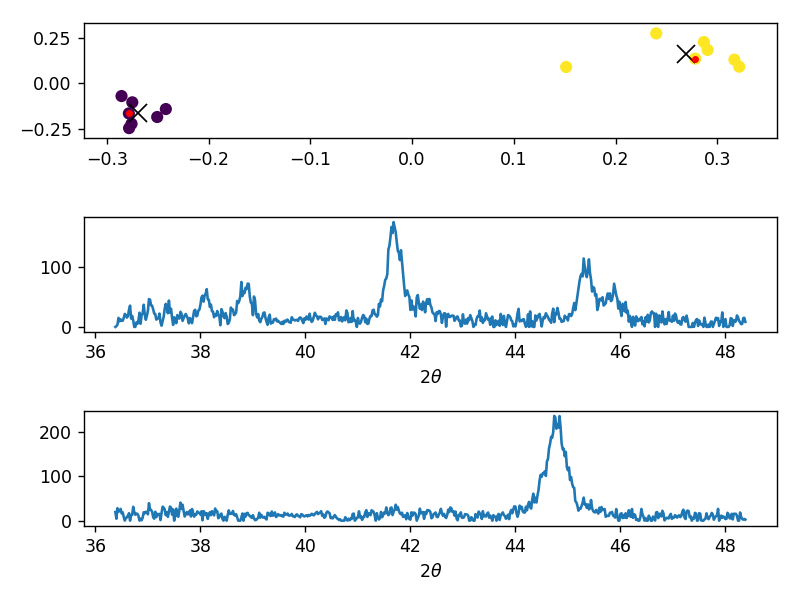

In [9]:
#%% representative results

# find the distance between the cluster centers and the MDS points
d = pairwise_distances(nm.concatenate((cluster_centers, pos), axis=0))

# find the MDS points closest to the cluster centers
cluster1_rep = nm.argmin(d[0,2:],axis = 0)
cluster2_rep = nm.argmin(d[1,2:],axis = 0)

# plot the cluster centers and indicate which point is closest to each center.
plt.figure(4)
plt.clf()
plt.subplot(3,1,1)
plt.scatter(pos[:,0],pos[:,1],c =L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'kx',markersize=10)
plt.plot(pos[cluster1_rep,0], pos[cluster1_rep,1],'r.')
plt.plot(pos[cluster2_rep,0], pos[cluster2_rep,1],'r.')

# plot the XRD for the sample closest to the cluster 1 center
plt.subplot(3,1,2)
plt.plot(nm.ravel(tth), s[cluster1_rep,:])
plt.xlabel(r'2$\theta$')

# plot the XRD for the sample closest to the cluster 2 center
plt.subplot(3,1,3)
plt.plot(nm.ravel(tth), s[cluster2_rep,:])
plt.xlabel(r'2$\theta$')
plt.tight_layout()

In [10]:
#%% Try out k-medoids

# import the k-medoids function from the file in the class folder

<IPython.core.display.Javascript object>


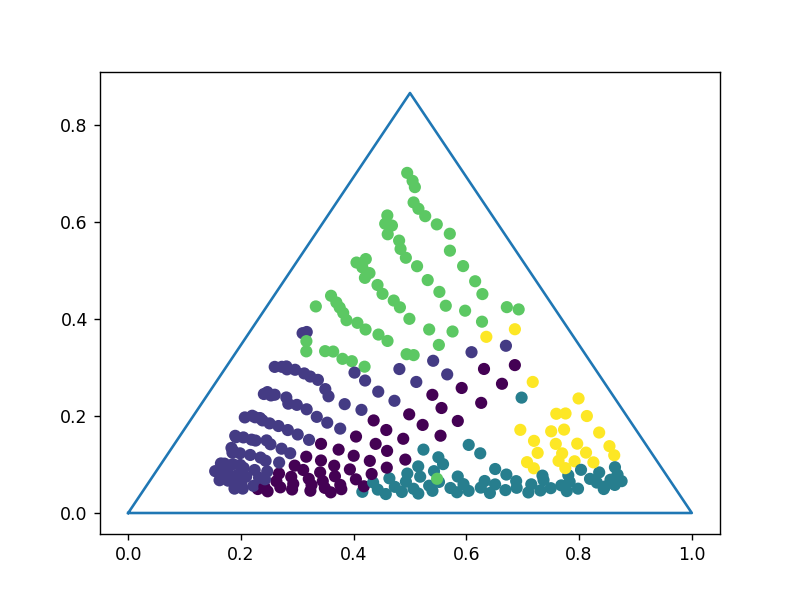

In [12]:
#%%
# Then add the function
from kmedoids_MLMR import cluster

# We're going to use kmedoids with Cosine dissimilarity
d = pairwise_distances(xrd, metric = 'cosine')

# Assume 5 clusters, plot clustering result
k = 5
L, kmed = cluster(d, k = 5)
plt.figure(5)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.scatter(nm.ravel(xy[:,0]), nm.ravel(xy[:,1]), c = L)

# Try running a few times. See if it changes.

In [13]:
#%% Gap Statistic: Identify the optimal number of clusters

# generate data set from 2 Gaussians.
x1 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x2 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x1[:,0] = x1[:,0] - 3
x2[:,0] = x2[:,0] + 3
x = nm.concatenate((x1, x2), axis=0)

x_ref = nm.random.uniform(size = (100,2))

<IPython.core.display.Javascript object>


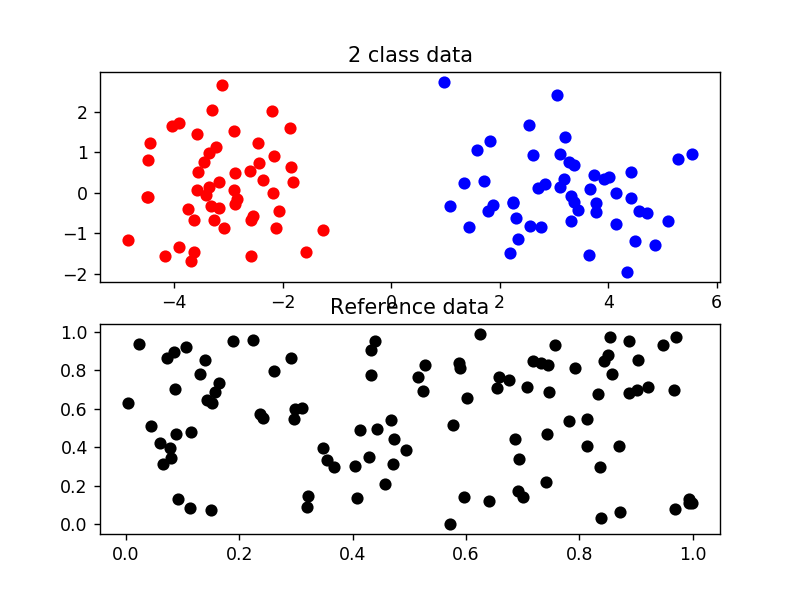

Text(0.5,1,'Reference data')

In [14]:
#%%
# plot the data from the 2 gaussians
plt.figure(6)
plt.clf()
plt.subplot(2,1,1)
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.title('2 class data')

# plot the data from the uniform distribution
plt.subplot(2,1,2)
plt.plot(x_ref[:,0],x_ref[:,1],'ko')
plt.title('Reference data')

In [15]:
#%%
# import the gap statistic functions from the class folder
from gap_MLMR import gap_statistic, find_optimal_k

# get the gap statistics data
# number of clusters attempted K = 1 through 10
gaps, sk, Kg, LogW, ExpectedLogW = gap_statistic(x, B = 10, K = range(1,11), N_init = 10)

# compute the optimal number of clusters
K_optimal = find_optimal_k(gaps, sk, Kg)

<IPython.core.display.Javascript object>


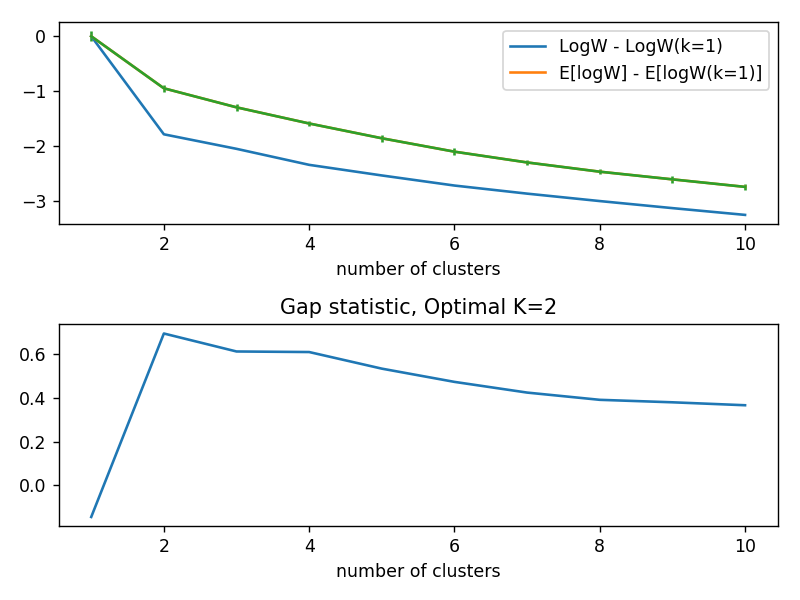

Text(0.5,0,'number of clusters')

In [16]:
#%% plot the log of within cluster scatter for K = 1:10
plt.figure(7)
plt.clf()
plt.subplot(2,1,1)
l1 = plt.plot(Kg, LogW - LogW[0], label = 'LogW - LogW(k=1)')
l2 = plt.plot(Kg, ExpectedLogW - ExpectedLogW[0], label = 'E[logW] - E[logW(k=1)]')
plt.errorbar(Kg, ExpectedLogW - ExpectedLogW[0],sk)
plt.legend()
plt.xlabel('number of clusters')

In [17]:
#%% plot the gap statistic and indicate the optimal K
plt.figure(7)
plt.subplot(2,1,2)
plt.plot(Kg,gaps)
plt.title('Gap statistic, Optimal K=' + str(K_optimal))
plt.xlabel('number of clusters')
plt.tight_layout()

<IPython.core.display.Javascript object>


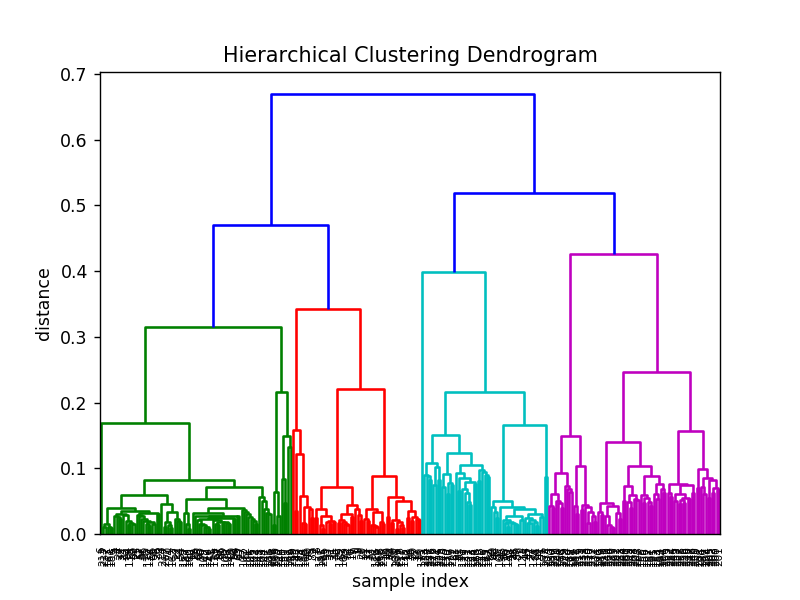

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [105.0, 105.0, 127.5, 127.5],
  [73.75, 73.75, 116.25, 116.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [212.5, 212.5, 240.0, 240.0],
  [195.0, 195.0, 226.25, 226.25],
  [185.0, 185.0, 210.625, 210.625],
  [175.0, 175.0, 197.8125, 197.8125],
  [165.0, 165.0, 186.40625, 186.40625],
  [255.0, 255.0, 265.0, 265.0],
  [175.703125, 175.703125, 260.0, 260.0],
  [95.0, 95.0, 217.8515625, 217.8515625],
  [31.25, 31.25, 156.42578125, 156.42578125],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [355.0, 355.0, 365.0, 365.0],
  

In [18]:
#%% Hierarchical Cluster Analysis
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# compute dissimilarity measure using cosine metric
# and create linkages for dendrogram
# linkages describe the merge points of the dendrogram.
Z = linkage(xrd, 'average', metric = 'cosine')

# plot dendrogram
plt.figure(8)
plt.clf()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

# rotates the x axis labels
dendrogram(Z, leaf_rotation=90., leaf_font_size=6.)

<IPython.core.display.Javascript object>


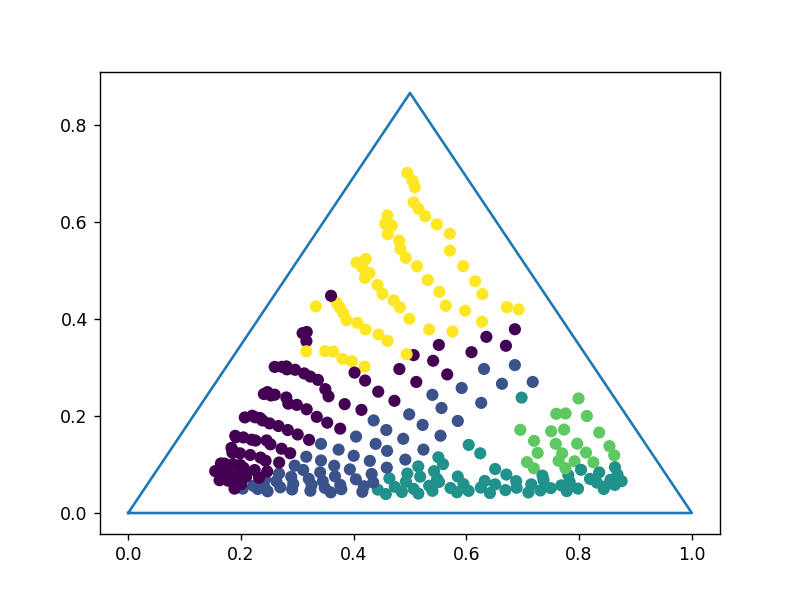

In [19]:
#%%
# identify HCA labels for 5 clusters
L = fcluster(Z, 5, criterion='maxclust')

# plot the results
plt.figure(9)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.scatter(nm.ravel(xy[:,0]),nm.ravel(xy[:,1]),c = L)

<IPython.core.display.Javascript object>


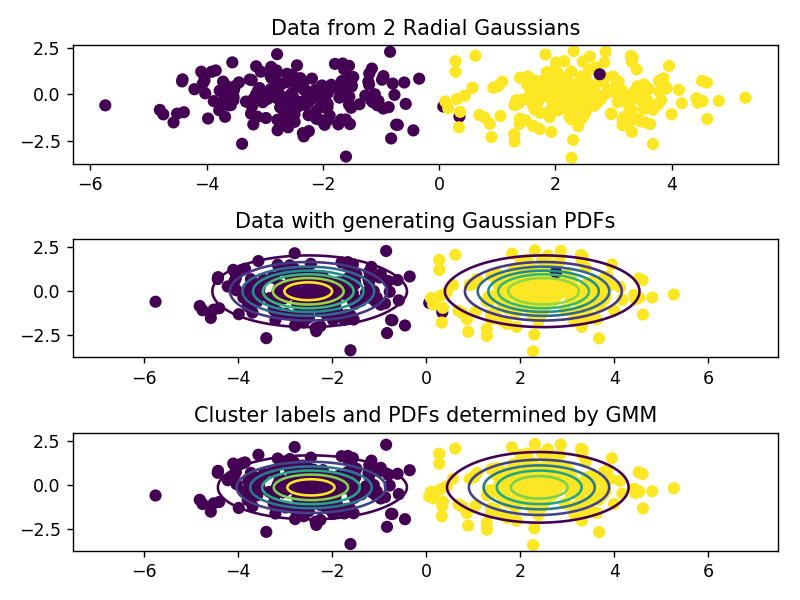

Text(0.5,1,'Data from 2 Radial Gaussians')

In [24]:
#%%  Gaussian Mixture Models
# generate data set from 2 Gaussians.
d = 5.
N = 200
x1 = nm.random.normal(loc = 0, scale = 1, size = (N,2))
x2 = nm.random.normal(loc = 0, scale = 1, size = (N,2))
x1[:,0] = x1[:,0] - d/2.
x2[:,0] = x2[:,0] + d/2.
x = nm.concatenate((x1, x2), axis=0)

# assign true labels to L
L_true = nm.repeat(1,2*N)
L_true[N:-1] = 2

# plot the data
plt.figure(10)
plt.clf()
plt.subplot(3,1,1)
plt.scatter(x[:,0], x[:,1], c = L_true)
plt.title('Data from 2 Radial Gaussians')

In [25]:
#%% Visualize the true Gaussian distribution
# https://matplotlib.org/examples/pylab_examples/contour_demo.html
import matplotlib.mlab as mlab
delta = 0.025
xv = nm.arange(-1.5*d, 1.5*d, delta)
yv = nm.arange(-3.0, 3.0, delta)
X, Y = nm.meshgrid(xv, yv)
Z1 = mlab.bivariate_normal(X, Y, sigmax = 1.0, sigmay = 1.0, mux = -d/2., muy = 0.0)
Z2 = mlab.bivariate_normal(X, Y, sigmax = 1.0, sigmay = 1.0, mux = d/2., muy = 0.0)
# difference of Gaussians
Z = Z2 + Z1

plt.figure(10)
plt.subplot(3,1,2)
plt.cla()
plt.scatter(x[:,0], x[:,1], c = L_true)
plt.contour(X, Y, Z)
plt.title('Data with generating Gaussian PDFs')

C:\Users\Boo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  
C:\Users\Boo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  if __name__ == '__main__':


Text(0.5,1,'Data with generating Gaussian PDFs')

In [26]:
#%% fit the gaussian model
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag').fit(x)

# obtain the cluster labels, cluster means and variances
L = gmm.predict(x)
gm = gmm.means_
gc = gmm.covariances_

In [27]:
#%%

# Visualize gaussian model results
Z1 = mlab.bivariate_normal(X, Y, sigmax = gc[0,0], sigmay = gc[0,1], mux = gm[0,0], muy = gm[0,1])
Z2 = mlab.bivariate_normal(X, Y, sigmax = gc[1,0], sigmay = gc[1,1], mux = gm[1,0], muy = gm[1,1])
# difference of Gaussians
Z = Z2 + Z1

plt.figure(10)
plt.subplot(3,1,3)
plt.cla()

# here we plot the clustering results
plt.scatter(x[:,0], x[:,1], c = L)

# here we plot the GMM determined gaussian PDFs
plt.contour(X, Y, Z)
plt.title('Cluster labels and PDFs determined by GMM')
plt.tight_layout()

C:\Users\Boo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  after removing the cwd from sys.path.
C:\Users\Boo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  """


In [28]:
#%% Spectral Clustering
# generate ring data
N = 360
t = nm.linspace(0, 6.28, N)
# outer ring
x1 = 5*nm.cos(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
y1 = 5*nm.sin(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
# inner ring
x2 = 3*nm.cos(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
y2 = 3*nm.sin(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])

x = nm.concatenate((x1, x2), axis=0)
y = nm.concatenate((y1, y2), axis=0)

X = nm.zeros((2*N,2))
X[:,0] = nm.expand_dims(x, axis=1)
X[:,1] = nm.expand_dims(y, axis=1)

<IPython.core.display.Javascript object>


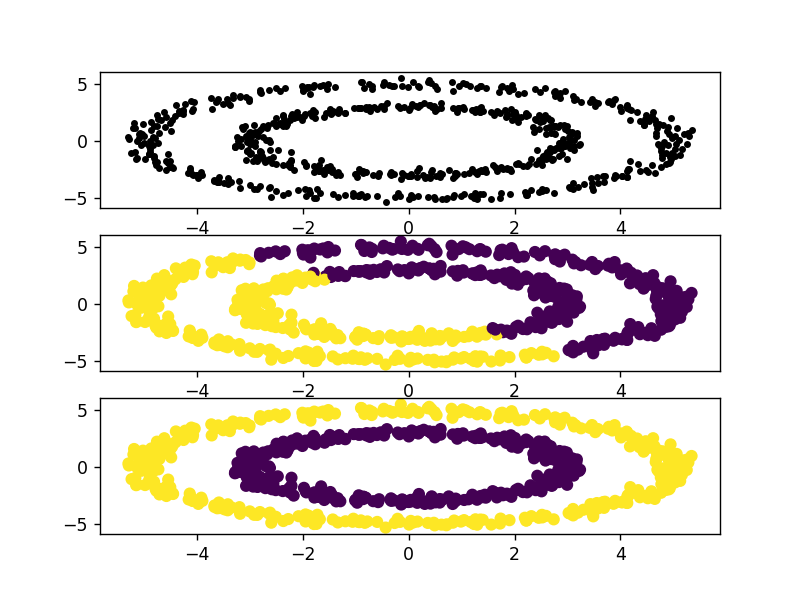

In [29]:
#%%
# plot data
plt.figure(11)
plt.clf()
plt.subplot(3,1,1)
plt.plot(x,y,'k.')

In [31]:
#%%
# cluster using kmeans
kmeans = KMeans(n_clusters=2, random_state = 0).fit(X)
L = kmeans.labels_

# plot results
plt.figure(11)
plt.subplot(3,1,2)
plt.cla()
plt.scatter(x, y, c = L)

C:\Users\Boo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [34]:
#%% Do the spectral clustering algorithm!
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# mix the samples!
#X = X[np.random.permutation(2*N),:]

# compute the euclidean dissimilarity matrix
d = pairwise_distances(X,metric = 'euclidean')

# find the 10 nearest neighbors
dist, ind = NearestNeighbors(n_neighbors = 10).fit(X).kneighbors(X, return_distance = True)
mdist = dist[:,-1]

# For all points greater than 10 NN, set value to max distance of all points
maxdist = np.max(nm.ravel(d))
d_ = nm.ones((d.shape[0],d.shape[1])) * maxdist
# For all points greater than 10 NN, set value to max distance of all points
for i in range(0,X.shape[0]):
    d_[i,ind[i,]] = d[i,ind[i,]]
    d_[ind[i,],i] = d[ind[i,],i]
d = d_

# convert dissimilarity matrix to similarity matrix
W = nm.exp( -.5*nm.power(d,2) )
# Similarity of sample i to sample i is set to 0
for i in range(0,W.shape[0]):
    W[i,i] = 1
    
# create the diagonal matrix with node volumes D
eps = 1E-10
degs = nm.ravel(W.sum(axis = 1))
D = nm.diag(degs)

# Compute the unnormalized Laplacian
L = D - W

# create inv(D)
degs[degs == 0] = eps
Dinv = nm.diag(1./degs)

# compute normalized Laplacian inv(D)*L
L = nm.matmul(Dinv, L)

# Us eigen analysis on normalized L
w, v = nm.linalg.eig(L)
w = np.absolute(w)
v = np.absolute(v)

# order the eigen values (and vectors) from smallest to largest
# and take the 2 smallest
k = 2
#
sort_index = np.argsort(w)
w = w[sort_index[np.arange(0,k)]]
v = v[:,sort_index[np.arange(0,k)]]

<IPython.core.display.Javascript object>


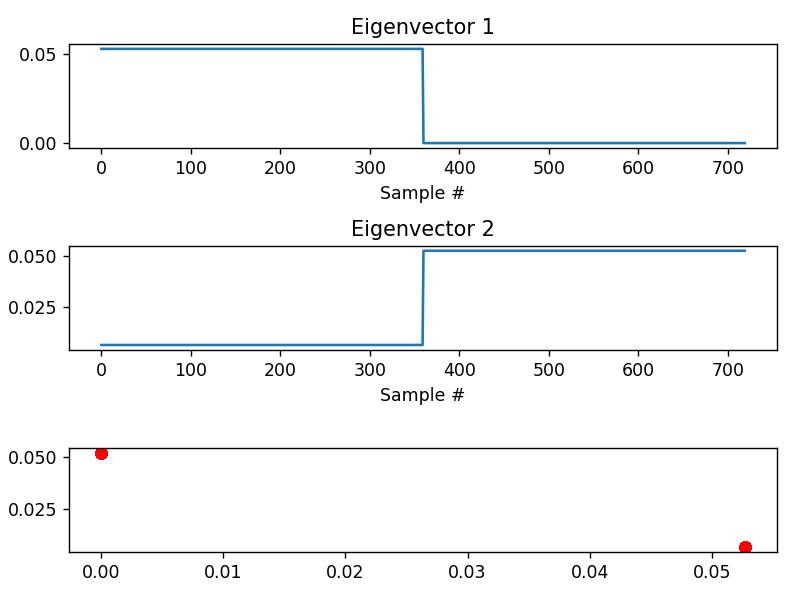

In [35]:
#%% Plot the eigenvectors
plt.figure(12)
plt.clf()
plt.subplot(3,1,1)
plt.plot(np.arange(0,X.shape[0]),np.ravel(v[:,0]))
plt.xlabel('Sample #')
plt.title('Eigenvector 1')
plt.subplot(3,1,2)
plt.plot(np.arange(0,X.shape[0]),np.ravel(v[:,1]))
plt.xlabel('Sample #')
plt.title('Eigenvector 2')
# plot the points in terms of the eigenvectors
plt.subplot(3,1,3)
plt.plot(np.ravel(v[:,0]),np.ravel(v[:,1]),'ro')

plt.tight_layout()

In [36]:
#%% run k-means on this mapped points.
kmeans = KMeans(n_clusters=2, random_state = 0).fit(v)
L_SC = kmeans.labels_

# Plot the results!
plt.figure(11)
plt.subplot(3,1,3)
plt.scatter(x,y,c = L_SC)

### What if X isn't in order by ring?

<IPython.core.display.Javascript object>


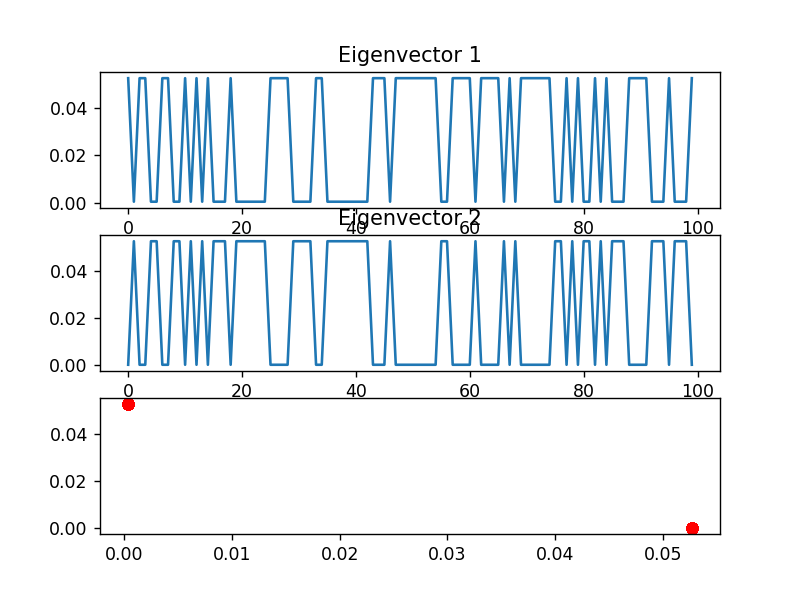

<IPython.core.display.Javascript object>


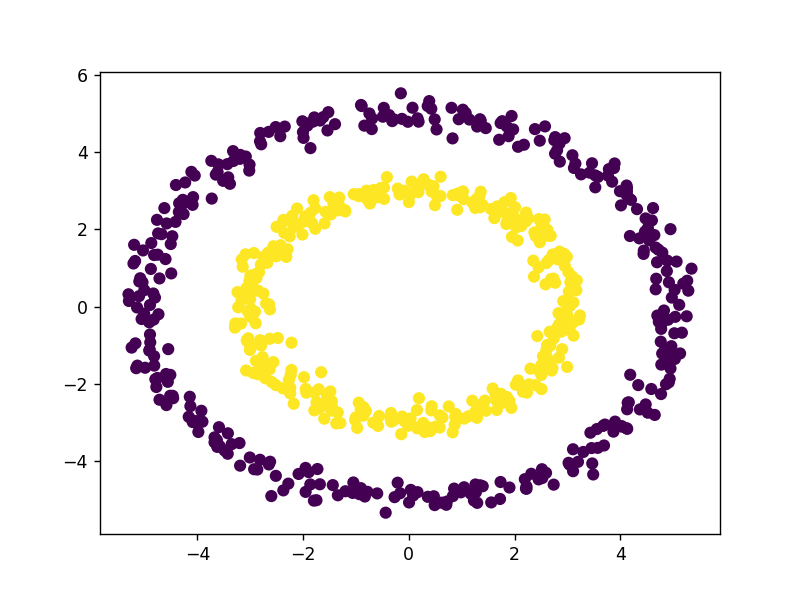

In [37]:
X = X[np.random.permutation(2*N),:]

# compute the euclidean dissimilarity matrix
d = pairwise_distances(X,metric = 'euclidean')

# find the 10 nearest neighbors
dist, ind = NearestNeighbors(n_neighbors = 10).fit(X).kneighbors(X, return_distance = True)
mdist = dist[:,-1]

# For all points greater than 10 NN, set value to max distance of all points
maxdist = np.max(nm.ravel(d))
d_ = nm.ones((d.shape[0],d.shape[1])) * maxdist
# For all points greater than 10 NN, set value to max distance of all points
for i in range(0,X.shape[0]):
    d_[i,ind[i,]] = d[i,ind[i,]]
    d_[ind[i,],i] = d[ind[i,],i]
d = d_

# convert dissimilarity matrix to similarity matrix
W = nm.exp( -.5*nm.power(d,2) )
# Similarity of sample i to sample i is set to 0
for i in range(0,W.shape[0]):
    W[i,i] = 0
    
# create the diagonal matrix with node volumes D
eps = 1E-10
degs = nm.ravel(W.sum(axis = 1))
D = nm.diag(degs)

# Compute the unnormalized Laplacian
L = D - W

# create inv(D)
degs[degs == 0] = eps
Dinv = nm.diag(1./degs)

# compute normalized Laplacian inv(D)*L
L = nm.matmul(Dinv, L)

# Us eigen analysis on normalized L
w, v = nm.linalg.eig(L)
w = np.absolute(w)
v = np.absolute(v)

# order the eigen values (and vectors) from smallest to largest
# and take the smallest
k = 2
#
sort_index = np.argsort(w)
w = w[sort_index[np.arange(0,k)]]
v = v[:,sort_index[np.arange(0,k)]]

plt.figure(13)
plt.clf()
plt.subplot(3,1,1)
plt.plot(np.arange(0,100),np.ravel(v[0:100,0]))
plt.xlabel('Sample #')
plt.title('Eigenvector 1')
plt.subplot(3,1,2)
plt.plot(np.arange(0,100),np.ravel(v[0:100,1]))
plt.xlabel('Sample #')
plt.title('Eigenvector 2')
# plot the points in terms of the eigenvectors
plt.subplot(3,1,3)
plt.plot(np.ravel(v[:,0]),np.ravel(v[:,1]),'ro')

kmeans = KMeans(n_clusters=2, random_state = 0).fit(v)
L_SC = kmeans.labels_

# Plot the results!
plt.figure(14)
plt.scatter(nm.ravel(X[:,0]),nm.ravel(X[:,1]),c = L_SC)